Load dataset

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import numpy as np
import os
from src import cleaning

In [94]:
# Load the dataset
try:
    df = pd.read_csv(os.path.join('data', 'raw', 'sample_data.csv'))
    print(f"Data loaded successfully, Shape: {df.shape}")
except FileNotFoundError:
    print("File not found at {data_path}. Please check the file path.")


Data loaded successfully, Shape: (7, 6)


In [95]:
# Display the first few rows of the dataframe
print(df.head(10))

    age   income  score  zipcode           city  extra_data
0  34.0  55000.0   0.82    90210        Beverly         NaN
1  45.0      NaN   0.91    10001       New York        42.0
2  29.0  42000.0    NaN    60614        Chicago         NaN
3  50.0  58000.0   0.76    94103             SF         NaN
4  38.0      NaN   0.88    73301         Austin         NaN
5   NaN      NaN   0.65    12345        Unknown         5.0
6  41.0  49000.0   0.79    94105  San Francisco         NaN


Number of missing values in column 'age': 1
Number of missing values in column 'income': 3
Number of missing values in column 'score': 1
Number of missing values in column 'zipcode': 0
Number of missing values in column 'city': 0
Number of missing values in column 'extra_data': 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6 non-null      float64
 1   income      4 non-null      float64
 2   score       6 non-null      float64
 3   zipcode     7 non-null      int64  
 4   city        7 non-null      object 
 5   extra_data  2 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 468.0+ bytes


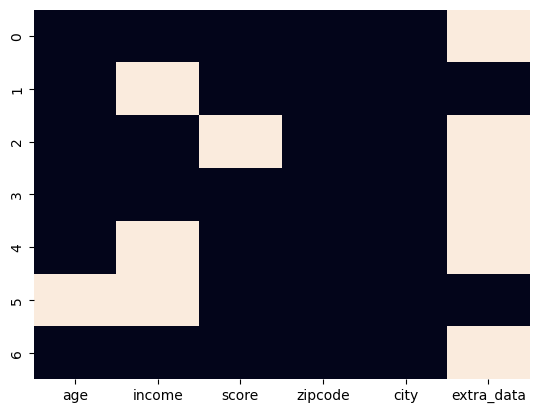

<Axes: >

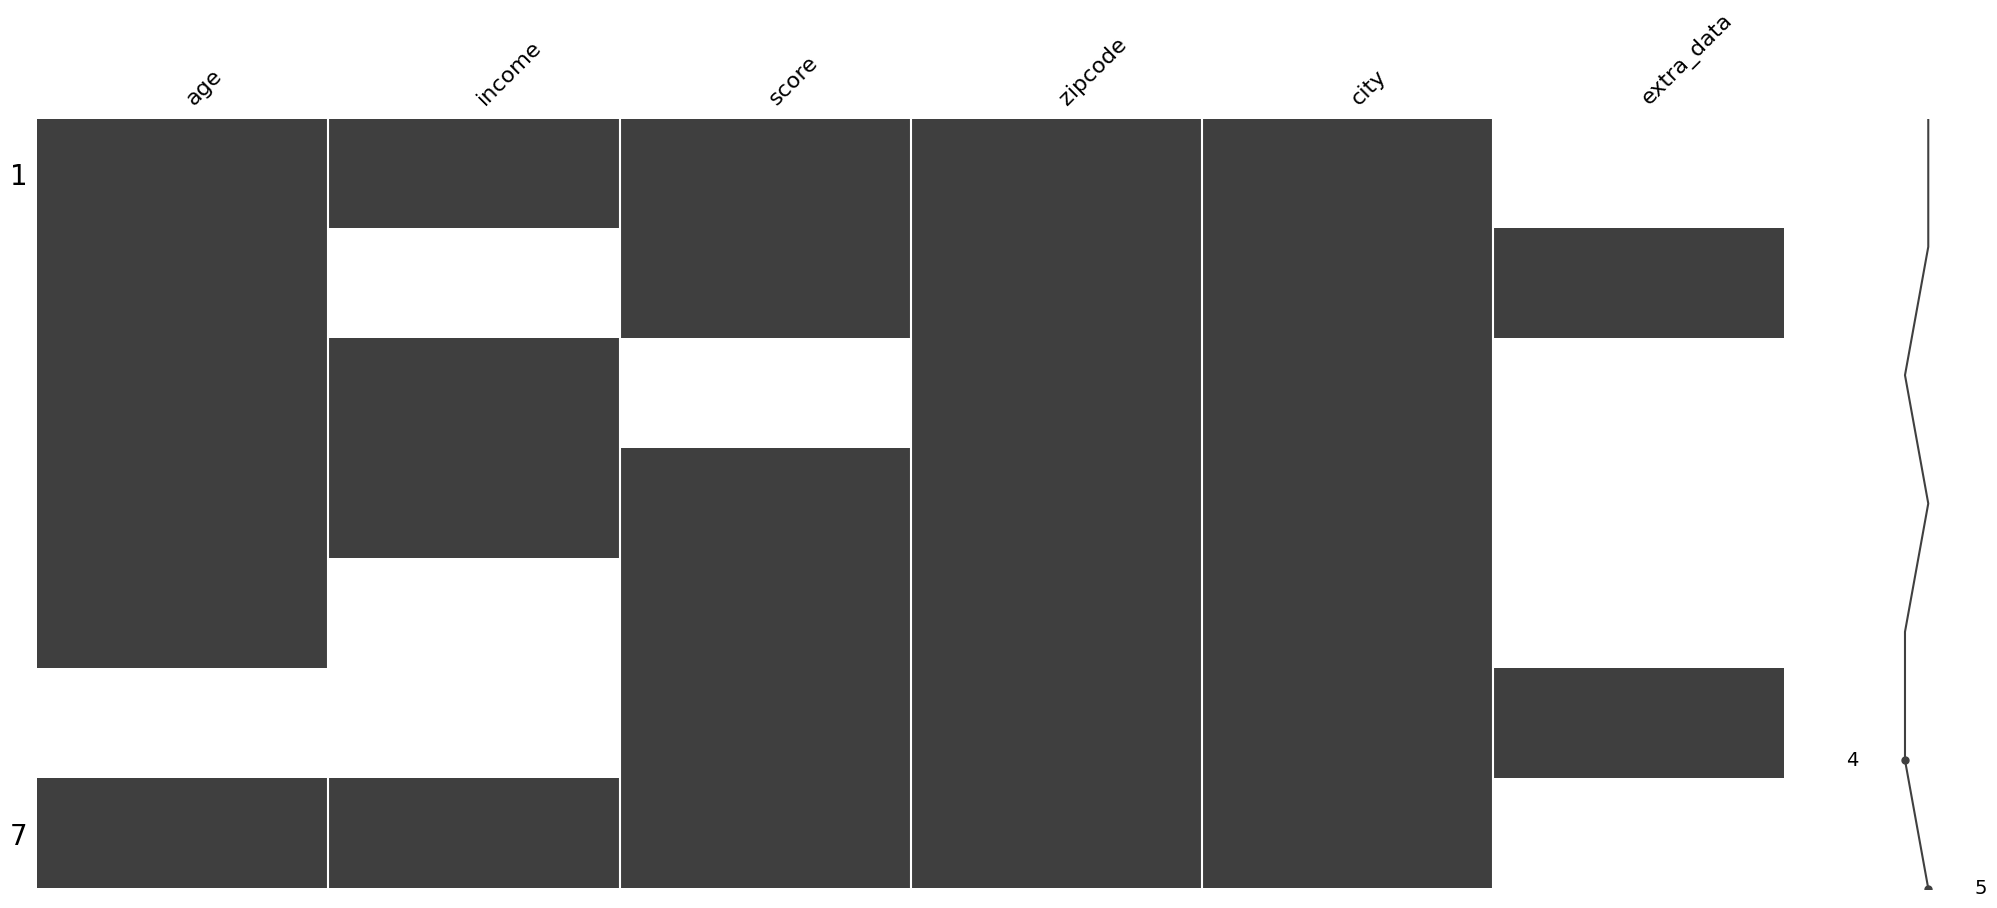

In [23]:
# Check the number of missing values in each column
for col in df.columns:
    print(f"Number of missing values in column '{col}':", df[col].isnull().sum())
df.info()

# Heatmap for missing data
sns.heatmap(df.isnull(), cbar=False)
plt.show()

# missingno visualization
msno.matrix(df)

In [96]:
#make sure to keep the original df intact
df['income']
df.shape[0],df.shape[1]
# len(df[])
random_number = np.random.rand(len(df))
df2 = df[['income']].copy()
df2['random_number'] = random_number
df2['random_number_true'] = random_number > 0.1
print(df2)
mask = random_number < 0.5
df2['income'][mask]#mask 

    income  random_number  random_number_true
0  55000.0       0.053096               False
1      NaN       0.220499                True
2  42000.0       0.978772                True
3  58000.0       0.621464                True
4      NaN       0.318296                True
5      NaN       0.063499               False
6  49000.0       0.926183                True


0    55000.0
1        NaN
4        NaN
5        NaN
Name: income, dtype: float64

In [97]:
# MCAR: random missing
df['MCAR_col'] = df['income'].mask(np.random.rand(len(df)) < 0.1)
# MAR: missing depends on another column
df['MAR_col'] = df['income'].mask(df['city']=='A')
# MNAR: missing depends on its own value
df['MNAR_col'] = df['income'].mask(df['income']>50)
df

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.82,90210,Beverly,NaN,55000.0,55000.0,NaN
1,45.0,NaN,0.91,10001,New York,42.0,NaN,NaN,NaN
2,29.0,42000.0,NaN,60614,Chicago,NaN,42000.0,42000.0,NaN
3,50.0,58000.0,0.76,94103,SF,NaN,58000.0,58000.0,NaN
4,38.0,NaN,0.88,73301,Austin,NaN,NaN,NaN,NaN
5,NaN,NaN,0.65,12345,Unknown,5.0,NaN,NaN,NaN
6,41.0,49000.0,0.79,94105,San Francisco,NaN,49000.0,49000.0,NaN


Apply cleaning functions

In [114]:
# 1. Fill missing with median
df_filled = cleaning.fill_missing_median(df, columns=['income','age','score', 'extra_data','MCAR_col', 'MAR_col', 'MNAR_col'])
df_filled

c:\Users\noven\anaconda3\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1214: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.820,90210,Beverly,23.5,55000.0,55000.0,NaN
1,45.0,52000.0,0.910,10001,New York,42.0,52000.0,52000.0,NaN
2,29.0,42000.0,0.805,60614,Chicago,23.5,42000.0,42000.0,NaN
3,50.0,58000.0,0.760,94103,SF,23.5,58000.0,58000.0,NaN
4,38.0,52000.0,0.880,73301,Austin,23.5,52000.0,52000.0,NaN
5,39.5,52000.0,0.650,12345,Unknown,5.0,52000.0,52000.0,NaN
6,41.0,49000.0,0.790,94105,San Francisco,23.5,49000.0,49000.0,NaN


In [125]:
# 2. drop missing values in specific columns
df_dropped = cleaning.drop_missing(df, columns=['age'])
df_dropped

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.82,90210,Beverly,NaN,55000.0,55000.0,NaN
1,45.0,NaN,0.91,10001,New York,42.0,NaN,NaN,NaN
2,29.0,42000.0,NaN,60614,Chicago,NaN,42000.0,42000.0,NaN
3,50.0,58000.0,0.76,94103,SF,NaN,58000.0,58000.0,NaN
4,38.0,NaN,0.88,73301,Austin,NaN,NaN,NaN,NaN
6,41.0,49000.0,0.79,94105,San Francisco,NaN,49000.0,49000.0,NaN


In [116]:
#3. Normalize data
df_normalized = cleaning.normalize_data(df, columns=['score'], method='minmax')
df_normalized

,age,income,score,zipcode,city,extra_data,MCAR_col,MAR_col,MNAR_col
0,34.0,55000.0,0.653846,90210,Beverly,NaN,55000.0,55000.0,NaN
1,45.0,NaN,1.000000,10001,New York,42.0,NaN,NaN,NaN
2,29.0,42000.0,NaN,60614,Chicago,NaN,42000.0,42000.0,NaN
3,50.0,58000.0,0.423077,94103,SF,NaN,58000.0,58000.0,NaN
4,38.0,NaN,0.884615,73301,Austin,NaN,NaN,NaN,NaN
5,NaN,NaN,0.000000,12345,Unknown,5.0,NaN,NaN,NaN
6,41.0,49000.0,0.538462,94105,San Francisco,NaN,49000.0,49000.0,NaN


Filtering examples

In [121]:
df_filtered = df[df['income'].astype(str).str.replace('$','').astype(float) > 0]
df['income'].astype(str).str.replace('$','').astype(float)>0

0     True
1    False
2     True
3     True
4    False
5    False
6     True
Name: income, dtype: bool

Corrections

In [123]:
# Currency string to numeric
if 'income' in df.columns:
    df['income'] = df['income'].astype(str).str.replace('$', '').astype(float)

In [135]:
# Demo DataFrame for column types
df_types_demo = pd.DataFrame({
    'all_integers': [1, 2, 3, 4, 5, 6],
    'integers_with_nan': [1, 2, np.nan, 4, 5, 6],
    'text_column': ['a', 'b', 'c', 'd', 'e', 'f'],
    'mixed_column': [1, 'two', 3, 4, 5, 6]
})
print("Demo DataFrame:")
print(df_types_demo)

# Show column types
print("\nColumn types:")
print(df_types_demo.dtypes)

# Convert 'integers_with_nan' to nullable Int64
df_types_demo['integers_with_nan'] = df_types_demo['integers_with_nan'].astype('Int64')
print("\nAfter converting 'integers_with_nan' to Int64:")
print(df_types_demo.dtypes)

# Select numeric columns (generic)
numeric_cols = df_types_demo.select_dtypes(include='number').columns
print("\nNumeric columns (generic):", list(numeric_cols))

# Select object columns (generic)
object_cols = df_types_demo.select_dtypes(include='object').columns
print("Object columns (generic):", list(object_cols))

Demo DataFrame:
   all_integers  integers_with_nan text_column mixed_column
0             1                1.0           a            1
1             2                2.0           b          two
2             3                NaN           c            3
3             4                4.0           d            4
4             5                5.0           e            5
5             6                6.0           f            6

Column types:
all_integers           int64
integers_with_nan    float64
text_column           object
mixed_column          object
dtype: object

After converting 'integers_with_nan' to Int64:
all_integers          int64
integers_with_nan     Int64
text_column          object
mixed_column         object
dtype: object

Numeric columns (generic): ['all_integers', 'integers_with_nan']
Object columns (generic): ['text_column', 'mixed_column']


Validation & save clean data

In [147]:
df_cleaned = df.copy()
df_cleaned = cleaning.fill_missing_median(df_cleaned, columns=['income','score', 'extra_data','MCAR_col', 'MAR_col'])
df_cleaned = cleaning.drop_missing(df_cleaned, columns=['age'] )
df_cleaned = cleaning.normalize_data(df_cleaned, columns=['score'], method='minmax')

# Inspect the cleaned DataFrame
df_cleaned.info()
df_cleaned.head()

# Save
df_cleaned.to_csv('data/processed/combined_cleaned_data.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 0 to 6
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         6 non-null      float64
 1   income      6 non-null      float64
 2   score       6 non-null      float64
 3   zipcode     6 non-null      int64  
 4   city        6 non-null      object 
 5   extra_data  6 non-null      float64
 6   MCAR_col    6 non-null      float64
 7   MAR_col     6 non-null      float64
 8   MNAR_col    0 non-null      float64
dtypes: float64(7), int64(1), object(1)
memory usage: 480.0+ bytes


# Stage 7 